### Шваб Кирилл, J42112  
# <center><u>Лабораторная работа №1</u></center>
## <center>Вариант 16</center>

### Реализуйте собственный генератор случайной выборки с плотностью <strong>p(x)</strong>:
$$p(x):=X_{[-2,-5^{1/3}]}(x)\cdot(x^2)$$
${-5^{1/3}}$ ≈ -1,7099

## 1. Проверьте выполнение условия нормировки. Нормируйте соответствующим образом, если условие нарушается.

#### Функция плотности распределения случайной величины имеет следующий вид:
$$p(x)=\begin{cases} 0 \quad\text{, если } x<-2\\
x^2 \quad\text{, если } x ∈ [-2,-5^{1/3}]\\
0 \quad\text{, если } x>-5^{1/3}\\
\end{cases}$$

### Геометрический смысл условия нормировки — площадь под кривой плотности распределения равна единице. То есть интеграл от функции должен быть равен единице.
$$\int_{-2}^{-5^{1/3}}x^2 dx+\int_{-∞}^{-2}0dx+\int_{-5^{1/3}}^{+∞}0dx=-\frac{5}{3}+\frac{8}{3}+0=1$$

### Таким образом, площадь под нашей функцией плотности равна единице и условие нормировки сохраняется.

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from numpy.random import uniform

In [83]:
# Начало и конец отрезка функции плотности распределения
A, B = -2, - pow(5, 1/3)

# Функция плотности распределения
def p(x):
    return x*x if x >= A and x <= B else 0


# расчитаем интеграл для фукнции плотности
# берем промежуток (-3,-1), так как на интервале с бесконечностями мы пропускаем значения локального минимума
integrate.quad(p, -3, -1)


(1.0000000006896357, 1.1780805553307516e-08)

## 2. Постройте график фукнции распределения

### Функция распределения случайной величины имеет следующий вид:
$$F(x)=\int_{-∞}^xf(x)dx=\begin{cases} 0 \quad\text{, если } x<-2\\
\frac{x^3}{3} + \frac{8}{3}  \quad\text{, если } x \in[-2; -5^{1/3}]\\
1 \quad\text{, если } x>-5^{1/3}
\end{cases}$$

In [84]:
# Функция распределения
def f(x):
    if x < A:
        return 0
    elif x > B:
        return 1
    elif x >= A and x <= B:
        return (x**3)/3 + 8/3

In [85]:
margin = 0.02  # отсуп для отображения значений вне интервала

interval = np.arange(A - margin, B + margin, 0.00001)  # интервал 

p_x = [p(x) for x in interval]  # значения функции плотности распределения
f_x = [f(x) for x in interval]  # значения функции распределения

## Изобразим функцию плотности распределения и функцию распределения

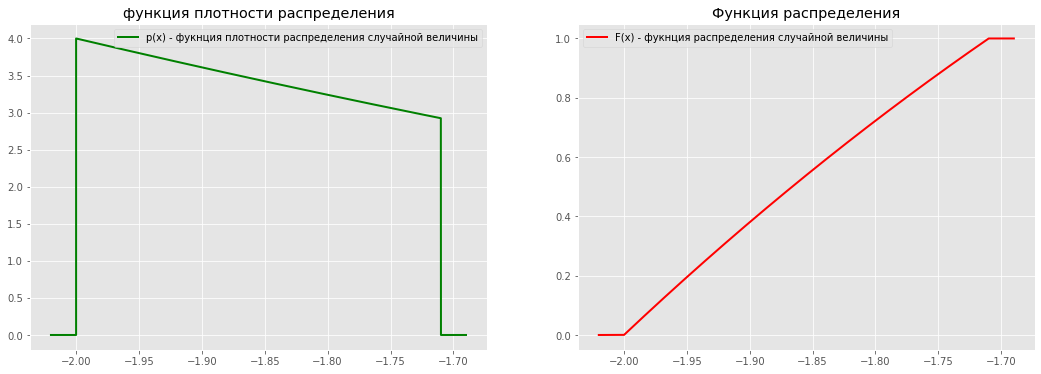

In [86]:
plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
plt.title('функция плотности распределения')
plt.plot(interval, p_x, linewidth=2, color='green',
         label='p(x) - фукнция плотности распределения случайной величины')
plt.legend(loc = 'best')
plt.subplot(1, 2, 2)
plt.title('Функция распределения')
plt.plot(interval, f_x, color='red', linewidth=2,
         label='F(x) - фукнция распределения случайной величины')
plt.legend(loc = 'best')
plt.show()

## 3. Сгенерируйте выборку из 
- 10 элементов
- 100 элементов
- 1000 элементов

### Для того, чтобы сгенерировать выборку по заданному закону распределения необходимо получить обратную функцию от текущей функции распределения случайной величины:
$$y=F^{-1}(x)=\begin{cases} 0 \quad\text{, если } x<0\\
{({3x - 8})^{1/3}} \quad\text{, если } x \in[0; 1]\\
1 \quad\text{, если } x>1
\end{cases}$$

In [100]:
# Границы отрезка для обратной функции
a_inv = 0
b_inv = 1

# обратная функция распределения
def f_inv(x):
    sign = 1 if x-8/3 >= 0 else -1  # чтобы pow не ругался

    if x >= a_inv and x <= b_inv:
        return sign*pow(abs(3*x-8), 1/3)
    elif x < a_inv:
        return A
    elif x > b_inv:
        return B

In [101]:
interval_inv = np.arange(a_inv, b_inv, 0.01)  # интервал прорисовки
f_inv_x = [f_inv(x) for x in interval_inv] # значения обратной функции на интервале

## Изобразим обратную функцию распределения

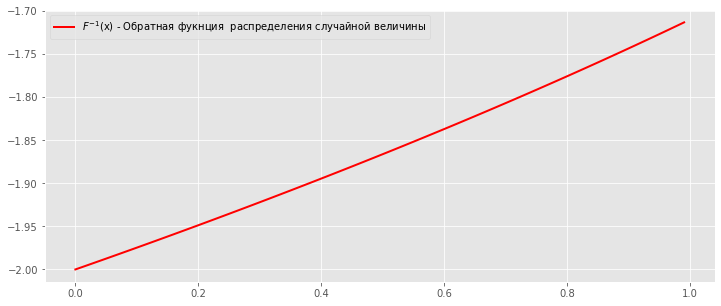

In [102]:
plt.figure(figsize=(12, 5))
plt.style.use('ggplot')
plt.plot(interval_inv, f_inv_x, linewidth=2, color='red',
         label='$F^{-1}$(x) - Обратная фукнция  распределения случайной величины')
plt.legend(loc='best')
plt.show()


In [103]:
# Генерация выборки размера number
def create_sample(number):
    arr = [f_inv(x) for x in uniform(a_inv, b_inv, number)]
    print(f'Создан набор из {number} элементов')
    return arr

samples = [create_sample(i) for i in [10, 100, 1000, 10**4]]  # список выборок

Создан набор из 10 элементов
Создан набор из 100 элементов
Создан набор из 1000 элементов
Создан набор из 10000 элементов


## 4. Постройте гистограмму частот для выборки из предыдущего пункта и сравните ее с плотностью распределения

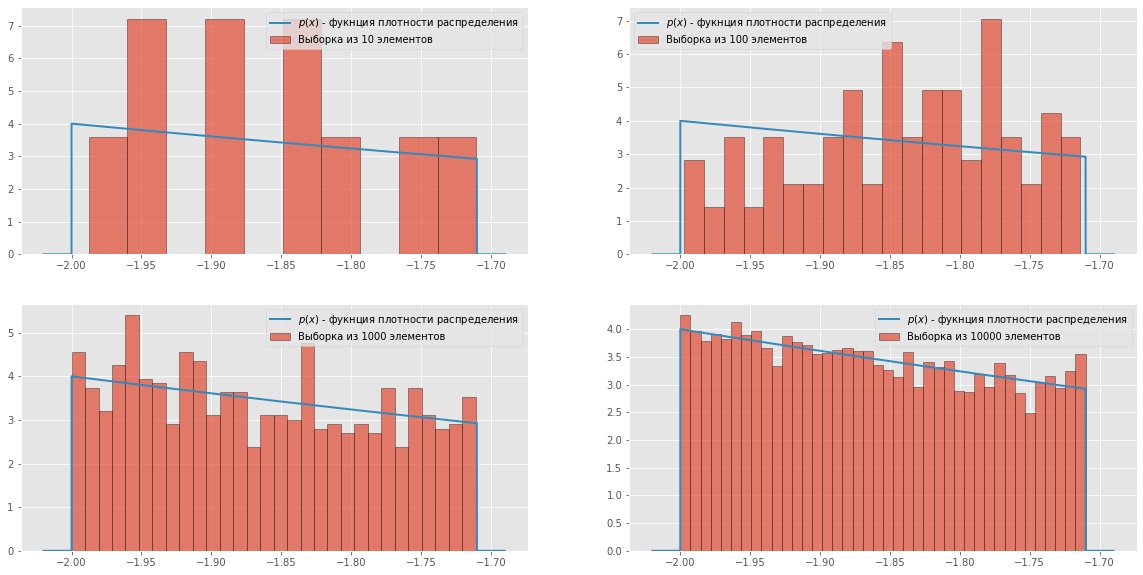

In [104]:
plt.figure(figsize=(20, 10))
plt.style.use('ggplot')

for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.hist(samples[i-1], 10+(i-1)*10, density=True, alpha=0.7, ec='black',
             label=f'Выборка из {len(samples[i-1])} элементов')
    plt.plot(interval, p_x, linewidth=2,
             label='$p(x)$ - фукнция плотности распределения')
    plt.legend(loc='best')


## 5. Напишите функцию, которая будет выводить следующую статистику по выборке: 
- минимальное/ максимальное значение; 
- размах; 
- среднее; 
- выборочную дисперсию (с поправкой и без); 
- среднеквадратическое отклонение; 
- медиану; 
- 25%-ную и 75%-ную квантили; 
- коэффициент вариации; 
- коэффициент асимметрии; 
- коэффициент эксцесса

In [ ]:
from scipy.stats import variation, kurtosis, skew


def statistic_info(arr: np.array):
    book = dict()
    book['Минимальное значение'] = arr.min()
    book['Максимальное значение'] = arr.max()
    book['Размах'] = arr.max() - arr.min()
    book['Мат. ожидание'] = arr.mean()
    book['Дисперсия'] = arr.var()
    book['Среднеквадратичное отклонение'] = arr.std()
    book['Медиана'] = np.median(arr) # увы arr.median() не работает, а как хотелось бы...
    book['25% квантиль'] = np.quantile(arr, 0.25)
    book['75% квантиль'] = np.quantile(arr, 0.75)
    book['Коэффициент вариации'] = variation(arr)
    book['Коэффициент асимметрии'] = skew(arr)
    book['Коэффициент эксцесса'] = kurtosis(arr)

    return book


In [ ]:
for i in range(len(samples)):
    print('='*35)
    print(f'ВЫБОРКА ИЗ {len(samples[i])} ЭЛЕМЕНТОВ')
    print('='*35)
    print(*[f'{k} : {v}' for k,
            v in statistic_info(np.array(samples[i])).items()], sep='\n')


ВЫБОРКА ИЗ 10 ЭЛЕМЕНТОВ
Минимальное значение : 2.028188881868103
Максимальное значение : 2.1591756160258226
Размах : 0.13098673415771955
Мат. ожидание : 2.1125760684853168
Дисперсия : 0.0011452869847525754
Среднеквадратичное отклонение : 0.03384208895373593
Медиана : 2.1210410386637584
25% квантиль : 2.101568070949652
75% квантиль : 2.1292259059943692
Коэффициент вариации : 0.016019346928416247
Коэффициент асимметрии : -1.2224410144143507
Коэффициент эксцесса : 1.3141819230603593
ВЫБОРКА ИЗ 100 ЭЛЕМЕНТОВ
Минимальное значение : 2.002229315739507
Максимальное значение : 2.221951606844766
Размах : 0.21972229110525898
Мат. ожидание : 2.127922536189778
Дисперсия : 0.003734711245553988
Среднеквадратичное отклонение : 0.061112283917016126
Медиана : 2.132474236574094
25% квантиль : 2.088805861441163
75% квантиль : 2.175942556278082
Коэффициент вариации : 0.028719223974404046
Коэффициент асимметрии : -0.4579329583877307
Коэффициент эксцесса : -0.8115331204990714
ВЫБОРКА ИЗ 1000 ЭЛЕМЕНТОВ
Минима